In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn.datasets as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Задача №1

In [129]:
# Создадим датасет с 2-мя переменными и бинарным у
N = 300
x,y = dt.make_classification(n_samples=N, n_features=2, n_repeated=0, class_sep=2, n_redundant=0)

In [130]:
y[0:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

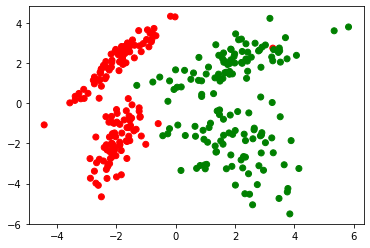

In [188]:
color= ['red' if a == 0 else 'green' for a in y]
plt.scatter(x[:,0], x[:,1], color=color)
plt.show()

In [201]:
# Обучим на данных нашу модель логистической регрессии
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [203]:
y_train.shape

(210,)

In [191]:
# Посмотрим на получившиеся коэффициенты
print(model.intercept_)
print(model.coef_)

[0.70566337]
[[ 2.34377569 -0.37147668]]


In [192]:
# Проверим качество модели
model.score(x_test, y_test)

0.9888888888888889

In [224]:
accuracy_score(y_test, model.predict(x_test))

0.9888888888888889

## Проведем оптимизацию параметров модели различными методами и измерим качество

### Метод градиентный спуск

In [206]:
# Функция сигмоида
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [207]:
EPOCHS = 500
LEARNING_RATE = 0.01
costs = []
params = []
predictions = []
params = [1,1,1]

In [208]:
params

[1, 1, 1]

In [209]:
for _ in range(EPOCHS):
    prediction = sigmoid(params[0] + params[1] * x_train[:,0] + params[2] * x_train[:,1])
    predictions.append(prediction)
    
    cost = - np.sum(y_train * np.log(prediction) + (1-y_train)*np.log(1-prediction)) / (len(x_train))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(prediction - y_train) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((prediction - y_train) * x_train[:,0]) / len(predictions)
    params[2] -= LEARNING_RATE * np.sum((prediction - y_train) * x_train[:,1]) / len(predictions)

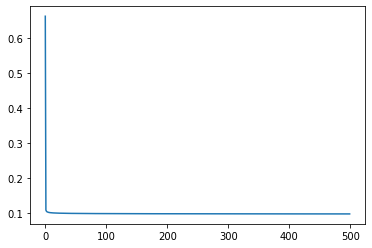

In [210]:
plt.plot(costs)

In [211]:
params

[0.698138356680885, 2.2880844220779695, -0.36441767773014994]

In [213]:
# Посмотрим на предсказания нашей модели с новыми параметров после оптимизации
y_pred = sigmoid(params[0] + params[1] * x_test[:,0] + params[2] * x_test[:,1])

In [227]:
y_pred_g = np.round(y_pred,0).reshape(90,1)

In [230]:
accuracy_score(y_test, y_pred_g)

0.9888888888888889

### Метод nesterov momentum

In [236]:
# В основном берется значение коэффициента сохранения равное 0.9
costs_n=[]
predictions_n = []
params_n = [1,1,1]
momentum = 0.9
pred=[]
EPOCHS_N = 1000

v0 = 0
v1 = 0
v2 = 0

eps = np.sqrt(np.finfo(float).eps)

In [237]:
for _ in range(EPOCHS_N):
    prediction_n = sigmoid(params_n[0] + params_n[1] * x_train[:,0] + params_n[2] * x_train[:,1])
    predictions_n.append(prediction_n)
    
    cost_n = - np.sum(y_train * np.log(prediction_n) + (1-y_train)*np.log((1+eps)-prediction_n)) / (len(x_train))
    costs_n.append(cost_n)
    
    pr_v0 = v0
    pr_v1 = v1
    pr_v2 = v2
    
    v0 = momentum * pr_v0 + LEARNING_RATE * ( np.sum(prediction_n - y_train) / len(predictions_n) )
    v1 = momentum * pr_v1 + LEARNING_RATE * ( np.sum((prediction_n - y_train) * x_train[:,0]) / len(predictions_n) )
    v2 = momentum * pr_v2 + LEARNING_RATE * ( np.sum((prediction_n - y_train) * x_train[:,1]) / len(predictions_n) )
    
    
    params_n[0] -= v0
    params_n[1] -= v1
    params_n[2] -= v2

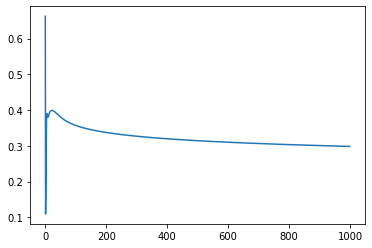

In [238]:
plt.plot(costs_n)
plt.show()

In [239]:
params_n

[0.7521529528468327, 12.980053481392243, -4.274998336333302]

In [240]:
# Посмотрим на предсказания нашей модели с новыми параметров после оптимизации Методом nesterov momentum
y_pred_1 = sigmoid(params_n[0] + params_n[1] * x_test[:,0] + params_n[2] * x_test[:,1])

In [241]:
y_pred_n = np.round(y_pred_1,0).reshape(90,1)

In [242]:
accuracy_score(y_test, y_pred_n)

0.9444444444444444

### Метод rmsprop

In [243]:
# В основном берется значение коэффициента сохранения равное 0.9
costs_r=[]
params_r = [1,1,1]

grad_sqr_0 = 0
grad_sqr_1 = 0
grad_sqr_2 = 0

momentum = 0.9
predictions_r = []

In [244]:
for _ in range(EPOCHS):
    prediction_r = sigmoid(params_r[0] + params_r[1] * x_train[:,0] + params_r[2] * x_train[:,1])
    predictions_r.append(prediction_r)
    
    cost_r = - np.sum(y_train * np.log(prediction_r) + (1-y_train)*np.log(1-prediction_r)) / (len(x_train))
    costs_r.append(cost_r)
    
    # Находим производные
    dt0 = np.sum(prediction_r - y_train) / len(predictions_r)
    dt1 = np.sum((prediction_r - y_train) * x_train[:,0]) / len(predictions_r)
    dt2 = np.sum((prediction_r - y_train) * x_train[:,1]) / len(predictions_r)
    
    grad_sqr_0 = momentum * grad_sqr_0 + (1 - momentum) * dt0**2
    grad_sqr_1 = momentum * grad_sqr_1 + (1 - momentum) * dt1**2
    grad_sqr_2 = momentum * grad_sqr_2 + (1 - momentum) * dt2**2
    
    params_r[0] += -LEARNING_RATE * dt0 / (np.sqrt(grad_sqr_0) + 1e-7)
    params_r[1] += -LEARNING_RATE * dt1 / (np.sqrt(grad_sqr_1) + 1e-7)
    params_r[2] += -LEARNING_RATE * dt2 / (np.sqrt(grad_sqr_2) + 1e-7)

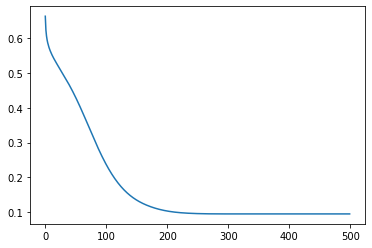

In [245]:
plt.plot(costs_r)
plt.show()

In [246]:
params_r

[1.0189216142524724, 2.7684577085061446, -0.4778346068545453]

In [248]:
# Посмотрим на предсказания нашей модели с новыми параметров после оптимизации Методом rmsprop
y_pred_2 = sigmoid(params_r[0] + params_r[1] * x_test[:,0] + params_r[2] * x_test[:,1])

In [249]:
y_pred_r = np.round(y_pred_2,0).reshape(90,1)

In [250]:
accuracy_score(y_test, y_pred_r)

0.9888888888888889